In [1]:
using Plots, DataFrames, CSV, Dates

In [2]:
data = CSV.read("KaggleV2-May-2016.csv", DataFrame)

Row,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
,Float64,Int64,String1,String31,String31,Int64,String31,Int64,Int64,Int64,Int64,Int64,Int64,String3
1,2.98725e13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
2,5.58998e14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
3,4.26296e12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
4,8.67951e11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
5,8.84119e12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
6,9.59851e13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
7,7.33688e14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
8,3.44983e12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
9,5.63947e13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No


In [3]:
# 1. Parse the datetime strings (they have a trailing "Z", so strip it)
data.ScheduledDT   = DateTime.(replace.(data.ScheduledDay, "Z" => ""), dateformat"yyyy-mm-ddTHH:MM:SS")
data.AppointmentDT = DateTime.(replace.(data.AppointmentDay, "Z" => ""), dateformat"yyyy-mm-ddTHH:MM:SS")

# 2. Keep only the date part (drop time-of-day)
data.ScheduledDate   = Date.(data.ScheduledDT)
data.AppointmentDate = Date.(data.AppointmentDT)

# 3. Compute waiting time in days (scheduled - appointment)
data.lead_time = Dates.value.(data.AppointmentDate .- data.ScheduledDate)
data

Row,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,ScheduledDT,AppointmentDT,ScheduledDate,AppointmentDate,lead_time
,Float64,Int64,String1,String31,String31,Int64,String31,Int64,Int64,Int64,Int64,Int64,Int64,String3,DateTime,DateTime,Date,Date,Int64
1,2.98725e13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,2016-04-29T18:38:08,2016-04-29T00:00:00,2016-04-29,2016-04-29,0
2,5.58998e14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,2016-04-29T16:08:27,2016-04-29T00:00:00,2016-04-29,2016-04-29,0
3,4.26296e12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,2016-04-29T16:19:04,2016-04-29T00:00:00,2016-04-29,2016-04-29,0
4,8.67951e11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,2016-04-29T17:29:31,2016-04-29T00:00:00,2016-04-29,2016-04-29,0
5,8.84119e12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,2016-04-29T16:07:23,2016-04-29T00:00:00,2016-04-29,2016-04-29,0
6,9.59851e13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No,2016-04-27T08:36:51,2016-04-29T00:00:00,2016-04-27,2016-04-29,2
7,7.33688e14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes,2016-04-27T15:05:12,2016-04-29T00:00:00,2016-04-27,2016-04-29,2
8,3.44983e12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes,2016-04-27T15:39:58,2016-04-29T00:00:00,2016-04-27,2016-04-29,2
9,5.63947e13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No,2016-04-29T08:02:16,2016-04-29T00:00:00,2016-04-29,2016-04-29,0


In [6]:
# Target variable
using StatsBase
target_counts = countmap(data[!, "No-show"])
println("Target distribution:")
for (k, v) in target_counts
    pct = round(100 * v / nrow(data), digits=2)
    println("  $k: $v ($pct%)")
end

Target distribution:
  Yes: 22319 (20.19%)
  No: 88208 (79.81%)


In [7]:
# Missing values
println("Missing values per column:")
for col in names(data)
    n_missing = sum(ismissing.(data[!, col]))
    if n_missing > 0
        println("  $col: $n_missing")
    end
end

Missing values per column:


In [8]:
# Suspicious values
println("Age < 0: ", sum(data.Age .< 0))
println("Age > 110: ", sum(data.Age .> 110))
println("Lead time < 0: ", sum(data.lead_time .< 0))
println("Lead time > 365: ", sum(data.lead_time .> 365))

# Age statistics
println("\nAge stats:")
println("  Mean: ", round(mean(data.Age), digits=1))
println("  Median: ", median(data.Age))
println("  Min: ", minimum(data.Age))
println("  Max: ", maximum(data.Age))

Age < 0: 1
Age > 110: 5
Lead time < 0: 5
Lead time > 365: 0

Age stats:
  Mean: 37.1
  Median: 37.0
  Min: -1
  Max: 115


In [13]:
# Count rows with Age = -1
println("Rows with Age = -1: ", sum(data.Age .== -1))

# If there are any, print specific columns
if sum(data.Age .== -1) > 0
    bad_age = data[data.Age .== -1, :]
    println("PatientId: ", bad_age.PatientId)
    println("Age: ", bad_age.Age)
    println("Gender: ", bad_age.Gender)
    println("No-show: ", bad_age[!, "No-show"])
end

Rows with Age = -1: 1
PatientId: [4.65943158731293e14]
Age: [-1]
Gender: String1["F"]
No-show: String3["No"]


In [9]:
# Binary features
binary_features = ["Gender", "Scholarship", "Hipertension", "Diabetes", 
                   "Alcoholism", "Handcap", "SMS_received"]

for feat in binary_features
    println("\n$feat:")
    counts = countmap(data[!, feat])
    for (k, v) in sort(collect(counts))
        pct = round(100 * v / nrow(data), digits=2)
        println("  $k: $v ($pct%)")
    end
end


Gender:
  F: 71840 (65.0%)
  M: 38687 (35.0%)

Scholarship:
  0: 99666 (90.17%)
  1: 10861 (9.83%)

Hipertension:
  0: 88726 (80.28%)
  1: 21801 (19.72%)

Diabetes:
  0: 102584 (92.81%)
  1: 7943 (7.19%)

Alcoholism:
  0: 107167 (96.96%)
  1: 3360 (3.04%)

Handcap:
  0: 108286 (97.97%)
  1: 2042 (1.85%)
  2: 183 (0.17%)
  3: 13 (0.01%)
  4: 3 (0.0%)

SMS_received:
  0: 75045 (67.9%)
  1: 35482 (32.1%)


In [10]:
# Lead time
println("Lead time stats:")
println("  Mean: ", round(mean(data.lead_time), digits=1))
println("  Median: ", median(data.lead_time))
println("  Min: ", minimum(data.lead_time))
println("  Max: ", maximum(data.lead_time))
println("  Same day (0): ", sum(data.lead_time .== 0))

Lead time stats:
  Mean: 10.2
  Median: 4.0
  Min: -6
  Max: 179
  Same day (0): 38563


In [15]:
# First, check how many negative lead times we have
println("Rows with negative lead_time: ", sum(data.lead_time .< 0))
println("Percentage: ", round(100 * sum(data.lead_time .< 0) / nrow(data), digits=2), "%")

# Look at a few examples (just print the values, no table)
if sum(data.lead_time .< 0) > 0
    neg_lead = data[data.lead_time .< 0, :]
    println("\nSample of negative lead times:")
    println("First 5 lead times: ", neg_lead.lead_time[1:5])
    println("Scheduled dates: ", neg_lead.ScheduledDate[1:5])
    println("Appointment dates: ", neg_lead.AppointmentDate[1:5])
end

Rows with negative lead_time: 5
Percentage: 0.0%

Sample of negative lead times:
First 5 lead times: [-1, -1, -1, -6, -1]
Scheduled dates: [Date("2016-05-10"), Date("2016-05-18"), Date("2016-05-05"), Date("2016-05-11"), Date("2016-05-04")]
Appointment dates: [Date("2016-05-09"), Date("2016-05-17"), Date("2016-05-04"), Date("2016-05-05"), Date("2016-05-03")]


In [16]:
using LinearAlgebra

# Numeric columns for correlation
numeric_cols = ["Age", "Scholarship", "Hipertension", "Diabetes", 
                "Alcoholism", "Handcap", "SMS_received", "lead_time"]

# Create matrix
data_matrix = Matrix{Float64}(data[!, numeric_cols])

# Correlation matrix
cor_matrix = cor(data_matrix)

# Print with labels
println("\nCorrelation Matrix:")
println("Columns: ", join(numeric_cols, ", "))
for i in 1:length(numeric_cols)
    print(rpad(numeric_cols[i], 15))
    for j in 1:length(numeric_cols)
        print(rpad(round(cor_matrix[i,j], digits=3), 8))
    end
    println()
end


Correlation Matrix:
Columns: Age, Scholarship, Hipertension, Diabetes, Alcoholism, Handcap, SMS_received, lead_time
Age            1.0     -0.092  0.505   0.292   0.096   0.078   0.013   0.035   
Scholarship    -0.092  1.0     -0.02   -0.025  0.035   -0.009  0.001   -0.03   
Hipertension   0.505   -0.02   1.0     0.433   0.088   0.08    -0.006  -0.017  
Diabetes       0.292   -0.025  0.433   1.0     0.018   0.058   -0.015  -0.027  
Alcoholism     0.096   0.035   0.088   0.018   1.0     0.005   -0.026  -0.039  
Handcap        0.078   -0.009  0.08    0.058   0.005   1.0     -0.024  -0.02   
SMS_received   0.013   0.001   -0.006  -0.015  -0.026  -0.024  1.0     0.398   
lead_time      0.035   -0.03   -0.017  -0.027  -0.039  -0.02   0.398   1.0     


In [17]:
# High correlations (|r| > 0.3, excluding diagonal)
println("\nHigh correlations (|r| > 0.3):")
for i in 1:length(numeric_cols)
    for j in (i+1):length(numeric_cols)
        if abs(cor_matrix[i,j]) > 0.3
            println("  $(numeric_cols[i]) <-> $(numeric_cols[j]): $(round(cor_matrix[i,j], digits=3))")
        end
    end
end


High correlations (|r| > 0.3):
  Age <-> Hipertension: 0.505
  Hipertension <-> Diabetes: 0.433
  SMS_received <-> lead_time: 0.398


In [18]:
# Variance analysis
println("\nFeature variance:")
for col in numeric_cols
    println("  $col: ", round(var(data[!, col]), digits=3))
end


Feature variance:
  Age: 534.082
  Scholarship: 0.089
  Hipertension: 0.158
  Diabetes: 0.067
  Alcoholism: 0.029
  Handcap: 0.026
  SMS_received: 0.218
  lead_time: 232.715


In [19]:
# Convert target to binary
data.no_show_binary = ifelse.(data[!, "No-show"] .== "Yes", 1, 0)

# No-show rate by each binary feature
println("\nNo-show rates by feature:")
for feat in binary_features
    println("\n$feat:")
    for val in sort(unique(data[!, feat]))
        subset = data[data[!, feat] .== val, :]
        rate = mean(subset.no_show_binary) * 100
        n = nrow(subset)
        println("  $val: $(round(rate, digits=2))% (n=$n)")
    end
end


No-show rates by feature:

Gender:
  F: 20.31% (n=71840)
  M: 19.97% (n=38687)

Scholarship:
  0: 19.81% (n=99666)
  1: 23.74% (n=10861)

Hipertension:
  0: 20.9% (n=88726)
  1: 17.3% (n=21801)

Diabetes:
  0: 20.36% (n=102584)
  1: 18.0% (n=7943)

Alcoholism:
  0: 20.19% (n=107167)
  1: 20.15% (n=3360)

Handcap:
  0: 20.24% (n=108286)
  1: 17.92% (n=2042)
  2: 20.22% (n=183)
  3: 23.08% (n=13)
  4: 33.33% (n=3)

SMS_received:
  0: 16.7% (n=75045)
  1: 27.57% (n=35482)


In [21]:
using Pkg
Pkg.add("CategoricalArrays")
using CategoricalArrays

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.11/Project.toml`
  No Changes to `~/.julia/environments/v1.11/Manifest.toml`


In [22]:
# Correlation between features and binary no-show target
data.no_show_binary = ifelse.(data[!, "No-show"] .== "Yes", 1, 0)

# Add target to correlation matrix
numeric_cols_with_target = ["Age", "Scholarship", "Hipertension", "Diabetes", 
                             "Alcoholism", "Handcap", "SMS_received", "lead_time", 
                             "no_show_binary"]

data_matrix = Matrix{Float64}(data[!, numeric_cols_with_target])
cor_matrix = cor(data_matrix)

# Print correlations with target (last column)
println("\nCorrelation with No-Show:")
for i in 1:(length(numeric_cols_with_target)-1)
    println("  $(numeric_cols_with_target[i]): $(round(cor_matrix[i, end], digits=3))")
end


Correlation with No-Show:
  Age: -0.06
  Scholarship: 0.029
  Hipertension: -0.036
  Diabetes: -0.015
  Alcoholism: -0.0
  Handcap: -0.006
  SMS_received: 0.126
  lead_time: 0.186


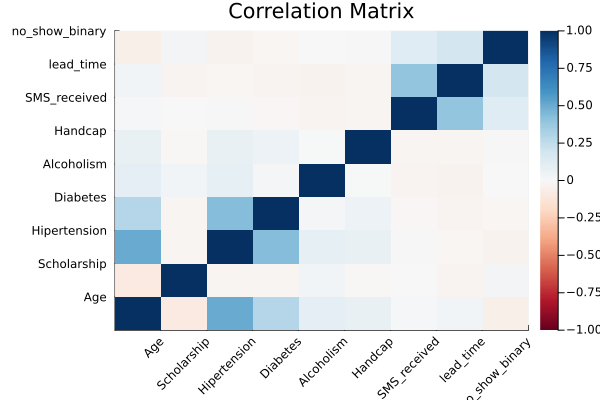

In [23]:
using Plots

# Create correlation matrix
numeric_cols = ["Age", "Scholarship", "Hipertension", "Diabetes", 
                "Alcoholism", "Handcap", "SMS_received", "lead_time", 
                "no_show_binary"]

data_matrix = Matrix{Float64}(data[!, numeric_cols])
cor_matrix = cor(data_matrix)

# Heatmap
heatmap(numeric_cols, numeric_cols, cor_matrix, 
        c=:RdBu, clim=(-1,1), 
        xlabel="", ylabel="", 
        title="Correlation Matrix",
        xticks=(1:length(numeric_cols), numeric_cols),
        yticks=(1:length(numeric_cols), numeric_cols),
        xrotation=45)

In [25]:
using Printf

# Create correlation matrix
numeric_cols = ["Age", "Scholarship", "Hipertension", "Diabetes", 
                "Alcoholism", "Handcap", "SMS_received", "lead_time", 
                "no_show_binary"]

data_matrix = Matrix{Float64}(data[!, numeric_cols])
cor_matrix = cor(data_matrix)

# Print with proper formatting
println("\nCorrelation Matrix with Values:")
println("="^100)

# Header row
print(rpad("", 15))
for col in numeric_cols
    print(rpad(col, 12))
end
println()
println("-"^100)

# Data rows
for i in 1:length(numeric_cols)
    print(rpad(numeric_cols[i], 15))
    for j in 1:length(numeric_cols)
        val = round(cor_matrix[i,j], digits=3)
        print(rpad(string(val), 12))
    end
    println()
end
println("="^100)


Correlation Matrix with Values:
               Age         Scholarship HipertensionDiabetes    Alcoholism  Handcap     SMS_receivedlead_time   no_show_binary
----------------------------------------------------------------------------------------------------
Age            1.0         -0.092      0.505       0.292       0.096       0.078       0.013       0.035       -0.06       
Scholarship    -0.092      1.0         -0.02       -0.025      0.035       -0.009      0.001       -0.03       0.029       
Hipertension   0.505       -0.02       1.0         0.433       0.088       0.08        -0.006      -0.017      -0.036      
Diabetes       0.292       -0.025      0.433       1.0         0.018       0.058       -0.015      -0.027      -0.015      
Alcoholism     0.096       0.035       0.088       0.018       1.0         0.005       -0.026      -0.039      -0.0        
Handcap        0.078       -0.009      0.08        0.058       0.005       1.0         -0.024      -0.02       -0.006   

In [26]:
# Group by neighbourhood and calculate no-show rate
using DataFrames, Statistics

neighbourhood_stats = combine(groupby(data, :Neighbourhood)) do df
    DataFrame(
        count = nrow(df),
        no_show_rate = mean(df.no_show_binary),
        no_show_count = sum(df.no_show_binary)
    )
end

# Sort by no-show rate
sort!(neighbourhood_stats, :no_show_rate, rev=true)

println("Top 10 neighbourhoods by no-show rate:")
println(neighbourhood_stats[1:10, :])

println("\nBottom 10 neighbourhoods by no-show rate:")
println(neighbourhood_stats[end-9:end, :])

# Check variance
println("\nNo-show rate range: ", 
        round(minimum(neighbourhood_stats.no_show_rate)*100, digits=1), "% to ",
        round(maximum(neighbourhood_stats.no_show_rate)*100, digits=1), "%")

Top 10 neighbourhoods by no-show rate:
10×4 DataFrame
 Row │ Neighbourhood                count  no_show_rate  no_show_count
     │ String31                     Int64  Float64       Int64
─────┼─────────────────────────────────────────────────────────────────
   1 │ ILHAS OCEÂNICAS DE TRINDADE      2      1.0                   2
   2 │ SANTOS DUMONT                 1276      0.289185            369
   3 │ SANTA CECÍLIA                  448      0.274554            123
   4 │ SANTA CLARA                    506      0.264822            134
   5 │ ITARARÉ                       3514      0.262664            923
   6 │ JESUS DE NAZARETH             2853      0.243954            696
   7 │ HORTO                          175      0.24                 42
   8 │ ILHA DO PRÍNCIPE              2266      0.234775            532
   9 │ CARATOÍRA                     2565      0.230409            591
  10 │ ANDORINHAS                    2262      0.230327            521

Bottom 10 neighbourhoods by n

In [35]:
Pkg.add("HypothesisTests")
Pkg.add("FreqTables")

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.11/Project.toml`
  No Changes to `~/.julia/environments/v1.11/Manifest.toml`
   Resolving package versions...
   Installed NamedArrays ─ v0.10.4
   Installed FreqTables ── v1.0.0
    Updating `~/.julia/environments/v1.11/Project.toml`
  [da1fdf0e] + FreqTables v1.0.0
    Updating `~/.julia/environments/v1.11/Manifest.toml`
  [da1fdf0e] + FreqTables v1.0.0
⌃ [86f7a689] + NamedArrays v0.10.4
        Info Packages marked with ⌃ have new versions available and may be upgradable.
Precompiling project...
   2451.6 ms  ✓ NamedArrays
   1357.4 ms  ✓ FreqTables
  2 dependencies successfully precompiled in 4 seconds. 155 already precompiled.


In [39]:
using HypothesisTests, FreqTables

# Chi-squared test between Neighbourhood and No-show
contingency_table = freqtable(data.Neighbourhood, data[!, "No-show"])

# Run chi-squared test
chi_test = ChisqTest(contingency_table)

println("Chi-squared test: Neighbourhood vs No-show")
println("Chi-squared statistic: ", chi_test.stat)
println("P-value: ", pvalue(chi_test))

# Calculate Cramer's V
n = nrow(data)
chi_sq = chi_test.stat
min_dim = minimum(size(contingency_table)) - 1
cramers_v = sqrt(chi_sq / (n * min_dim))

println("\nCramer's V: ", round(cramers_v, digits=3))
println("Interpretation:")
println("  0.0 - 0.1: Weak association")
println("  0.1 - 0.3: Moderate association")
println("  0.3+: Strong association")

Chi-squared test: Neighbourhood vs No-show
Chi-squared statistic: 491.9278694965134
P-value: 1.5424359262220053e-60

Cramer's V: 0.067
Interpretation:
  0.0 - 0.1: Weak association
  0.1 - 0.3: Moderate association
  0.3+: Strong association


In [37]:
# Target encode: replace neighbourhood with its average no-show rate
neighbourhood_encoding = Dict()
for row in eachrow(neighbourhood_stats)
    neighbourhood_encoding[row.Neighbourhood] = row.no_show_rate
end

data.neighbourhood_encoded = [neighbourhood_encoding[n] for n in data.Neighbourhood]

# Create binary encoding for Gender
data.Gender_binary = ifelse.(data.Gender .== "F", 1, 0)

# Check it worked
println("Gender encoding:")
println("  Female (F) -> 1: ", sum(data.Gender_binary .== 1))
println("  Male (M) -> 0: ", sum(data.Gender_binary .== 0))

Gender encoding:
  Female (F) -> 1: 71840
  Male (M) -> 0: 38687


In [38]:
using Statistics

# Standardize continuous variables only (not binary ones)
data.Age_std = (data.Age .- mean(data.Age)) ./ std(data.Age)
data.lead_time_std = (data.lead_time .- mean(data.lead_time)) ./ std(data.lead_time)
data.neighbourhood_encoded_std = (data.neighbourhood_encoded .- mean(data.neighbourhood_encoded)) ./ std(data.neighbourhood_encoded)

# Now use standardized versions in logistic
formula = @formula(no_show_binary ~ Age_std + Gender_binary + Scholarship + 
                   Hipertension + Diabetes + SMS_received + lead_time_std + 
                   neighbourhood_encoded_std)

logit_model = glm(formula, data, Binomial(), LogitLink())
println(logit_model)

StatsModels.TableRegressionModel{GeneralizedLinearModel{GLM.GlmResp{Vector{Float64}, Binomial{Float64}, LogitLink}, GLM.DensePredChol{Float64, CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

no_show_binary ~ 1 + Age_std + Gender_binary + Scholarship + Hipertension + Diabetes + SMS_received + lead_time_std + neighbourhood_encoded_std

Coefficients:
──────────────────────────────────────────────────────────────────────────────────────────────
                                 Coef.  Std. Error        z  Pr(>|z|)   Lower 95%    Upper 95%
──────────────────────────────────────────────────────────────────────────────────────────────
(Intercept)                -1.58252     0.0152487   -103.78    <1e-99  -1.61241    -1.55264
Age_std                    -0.164218    0.00918415   -17.88    <1e-70  -0.182219   -0.146218
Gender_binary               0.00874531  0.0163831      0.53    0.5935  -0.0233649   0.0408556
Scholarship                 0.213793    0.0247595      8

In [4]:
#eda graphs
histogram(data.Age, bins=50, title="Age Distribution", xlabel="Age", ylabel="Frequency")
bar(combine(groupby(data, :Gender), nrow => :Count), :Gender, :Count, title=" Gender Distribution", xlabel=" Gender", ylabel="Count")
bar(combine(groupby(data, :No_show), nrow => :Count), :No_show, :Count, title=" No-show Distribution", xlabel=" No-show", ylabel="Count")
bar(combine(groupby(data, :Scholarship), nrow => :Count), :Scholarship, :Count, title=" Scholarship Distribution", xlabel=" Scholarship", ylabel="Count")
bar(combine(groupby(data, :Hipertension), nrow => :Count), :Hipertension, :Count, title=" Hypertension Distribution", xlabel=" Hypertension", ylabel="Count")
bar(combine(groupby(data, :Diabetes), nrow => :Count), :Diabetes, :Count, title=" Diabetes Distribution", xlabel=" Diabetes", ylabel="Count")
bar(combine(groupby(data, :Alcoholism), nrow => :Count), :Alcoholism, :Count, title=" Alcoholism Distribution", xlabel=" Alcoholism", ylabel="Count")
bar(combine(groupby(data, :Handcap), nrow => :Count), :Handcap, :Count, title=" Handicap Distribution", xlabel=" Handicap", ylabel="Count")
bar(combine(groupby(data, :SMS_received), nrow => :Count), :SMS_received, :Count, title=" SMS Received Distribution", xlabel=" SMS Received", ylabel="Count")
# histogram(data.lead_time, bins=50, title="Lead Time Distribution", xlabel=" Lead Time (days)", ylabel="Frequency")
bar(combine(groupby(data, :day_of_week), nrow => :Count), :day_of_week, :Count, title=" Day of Week Distribution", xlabel=" Day of Week", ylabel="Count")
bar(combine(groupby(data, :appointment_month), nrow => :Count), :appointment_month, :Count, title=" Appointment Month Distribution", xlabel=" Appointment Month", ylabel="Count")
scatter(data.lead_time, data.Age, title="Lead Time vs Age", xlabel=" Lead Time (days)", ylabel=" Age")


LoadError: Cannot convert DataFrame to series data for plotting